# R - Data Visualizations
**You must be running the R-Data Viz container for this to function

In [1]:
library(ggplot2)
library(plotly)
library(RColorBrewer)
library(dplyr)


Attaching package: ‘plotly’

The following object is masked from ‘package:ggplot2’:

    last_plot

The following object is masked from ‘package:stats’:

    filter

The following object is masked from ‘package:graphics’:

    layout


Attaching package: ‘dplyr’

The following objects are masked from ‘package:stats’:

    filter, lag

The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union



## Pulling in Data and Some Cleanup

In [2]:
# Pulling in the csv file with our metrics of price, mileage, and model count
df = read.csv('/dsa/groups/casestudy2022su/team05/temp_ungrouped.csv')

In [3]:
head(df)

Make,Model,Year,X..Price....mean..,X..Price....min..,X..Price....max..,X..Mileage....mean..,X..Mileage....min..,X..Mileage....max..,index
<fct>,<fct>,<int>,<dbl>,<int>,<int>,<dbl>,<int>,<int>,<int>
Acura,ILX,2016,20463.08,14593,23990,71307.00,31060,124681,12
Acura,ILX,2017,22925.92,20189,23998,46739.00,38495,57556,12
Acura,ILX,2018,23806.67,23590,24990,26139.83,23968,34774,12
Acura,ILX,2019,28507.50,27260,29998,28269.50,10387,37200,16
Acura,ILX,2020,27400.00,27400,27400,13469.00,13469,13469,1
Acura,ILX,2021,31950.00,31000,32900,16285.50,9034,23537,2


In [4]:
df <- df %>% mutate_if(is.numeric, round, digits = 0)
head(df)

Make,Model,Year,X..Price....mean..,X..Price....min..,X..Price....max..,X..Mileage....mean..,X..Mileage....min..,X..Mileage....max..,index
<fct>,<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Acura,ILX,2016,20463,14593,23990,71307,31060,124681,12
Acura,ILX,2017,22926,20189,23998,46739,38495,57556,12
Acura,ILX,2018,23807,23590,24990,26140,23968,34774,12
Acura,ILX,2019,28508,27260,29998,28270,10387,37200,16
Acura,ILX,2020,27400,27400,27400,13469,13469,13469,1
Acura,ILX,2021,31950,31000,32900,16286,9034,23537,2


In [5]:
# Renaming columns
df <- df %>% 
  rename(
    Price_mean = X..Price....mean..,
    Price_min = X..Price....min..,
    Price_max = X..Price....max..,
    Mileage_mean = X..Mileage....mean..,
    Mileage_min = X..Mileage....min..,
    Mileage_max = X..Mileage....max..,
    Count = index
    )

## Plotting the entire dataset

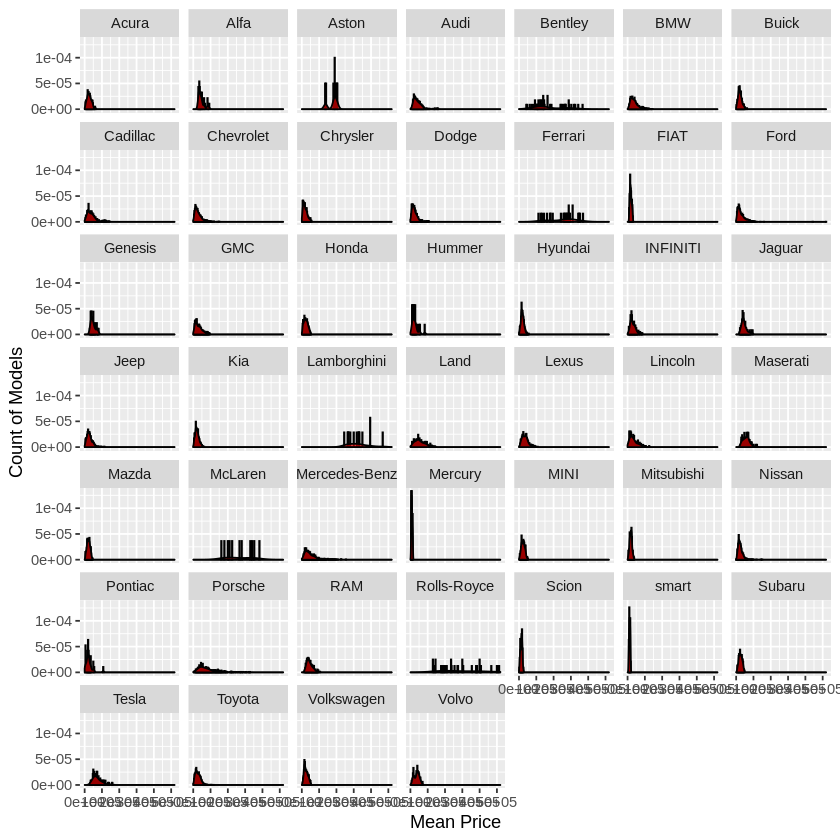

In [6]:
#Plotting all Price_means on the X axis with denisty of models on the Y axis

ggplot(df, aes(x=Price_mean)) + 
 geom_histogram(aes(y=..density..), colour="black", fill="lightblue", binwidth=2500) +
  facet_wrap(~Make) + labs(x= 'Mean Price', y = 'Count of Models') +
     geom_density(alpha=.6, fill="red") 

In [7]:
#reducing the data to a count greater or equal to 5 and year greater or equal than 2010
data_reduced <- df %>% filter(Count >= 5 & Year >= 2010)

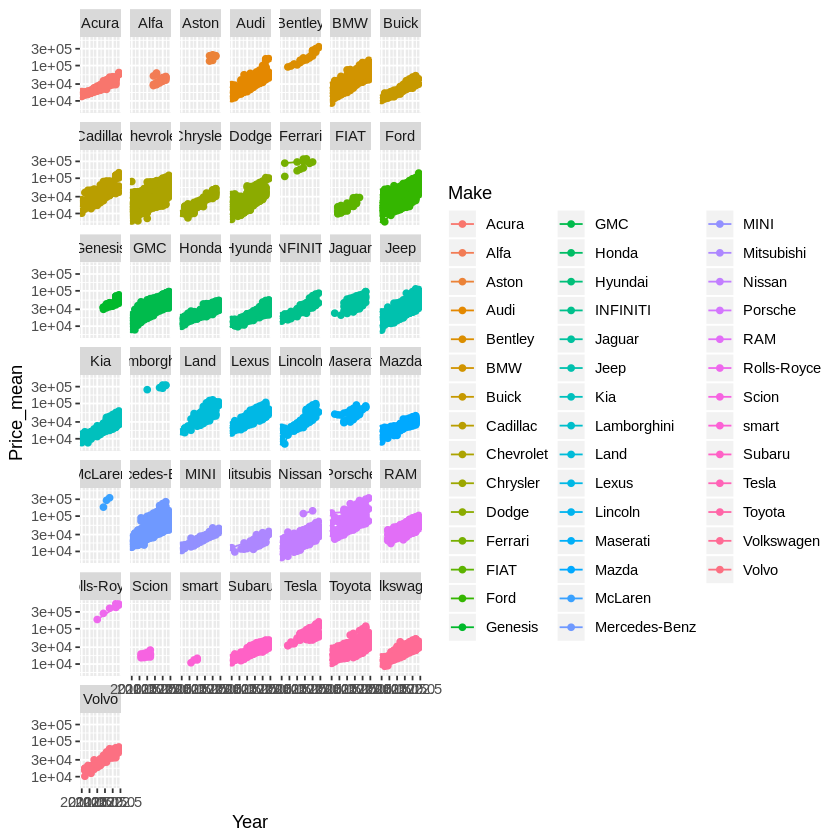

In [8]:
# Plotting a geom point of grouping Models against mean price and facet wrapping by make
# In this plot the more steap the line the more price reduction year over year. 
ggplot(data_reduced, aes(x=Year, y=Price_mean, group=Model, color = Make)) + geom_line() +
       geom_point() + scale_y_log10() + facet_wrap(~Make)

## Subsetting the Data - American Brands

In [9]:
# Previous plot was to crowded. Reducing to American Manuf
data_usa_brands <- data_reduced %>% filter(Make == 'Chevrolet' | Make == 'Ford' | Make == 'Dodge'| Make == 'RAM'|
                                              Make == 'GMC'| Make == 'Jeep')

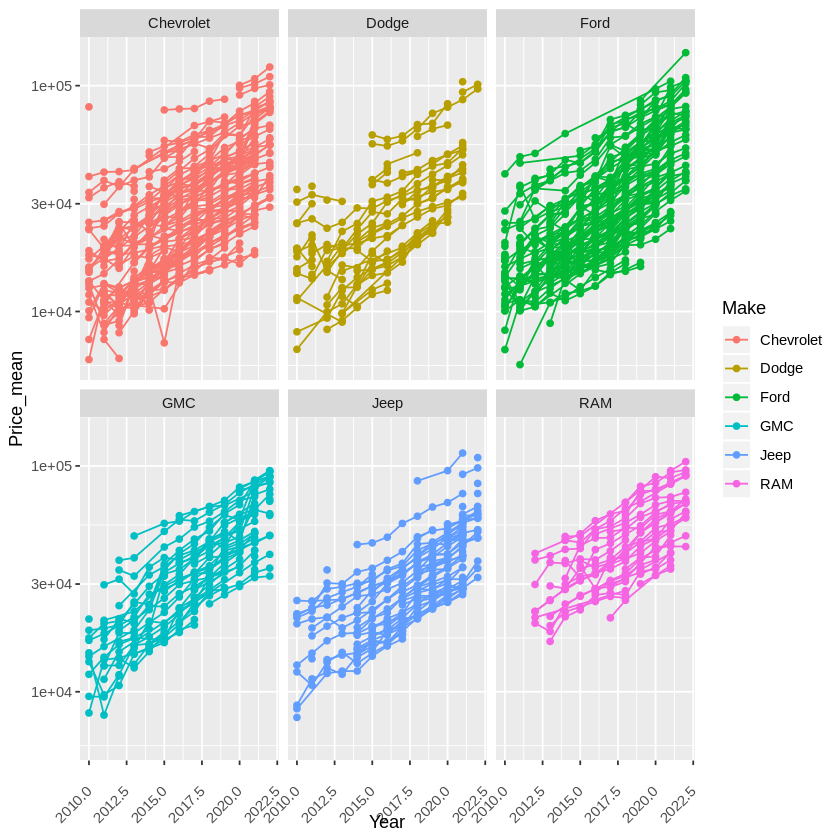

In [10]:
# Same plot for American Manuf
ggplot(data_usa_brands, aes(x=Year, y=Price_mean, group=Model, color = Make)) + geom_line() +
       geom_point() + scale_y_log10() + facet_wrap(~Make)+ theme(axis.text.x = element_text(angle = 45, vjust = 0.5, hjust=1))

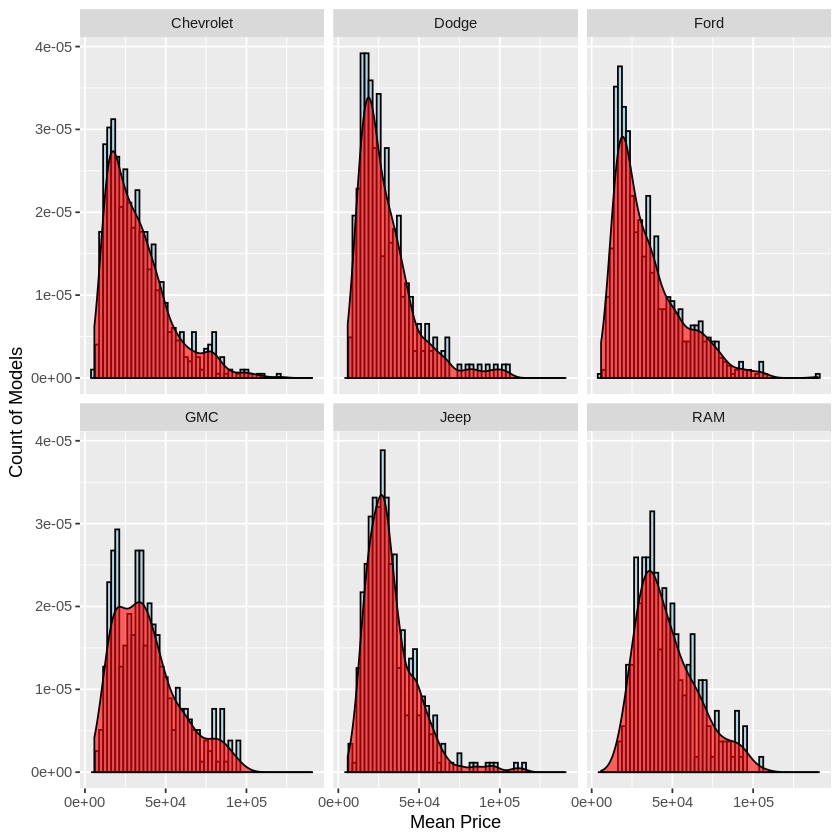

In [11]:
# Trying density plot of models by mean price 
# You can see GMC has more expensive models compared to ford
ggplot(data_usa_brands, aes(x=Price_mean)) + 
 geom_histogram(aes(y=..density..), colour="black", fill="lightblue", binwidth=2500) +
  facet_wrap(~Make) + labs(x= 'Mean Price', y = 'Count of Models') +
     geom_density(alpha=.6, fill="red") 

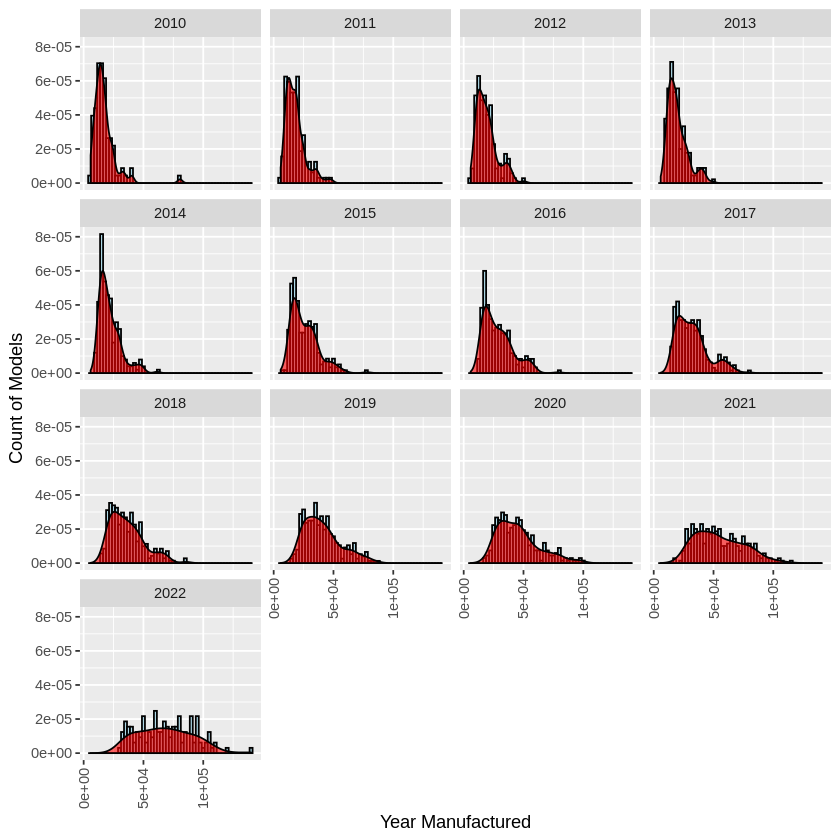

In [12]:
# Trying density plot of models by Year
# The spread in price really starts to group towards the left after 2017
# This may be an interesting plot broken out for each Manuf
ggplot(data_usa_brands, aes(x=Price_mean)) + 
 geom_histogram(aes(y=..density..), colour="black", fill="lightblue", binwidth=2500) +
  facet_wrap(~Year) + labs(x= 'Year Manufactured', y = 'Count of Models') +
     geom_density(alpha=.6, fill="red") + theme(axis.text.x = element_text(angle = 90, vjust = 0.5, hjust=1))

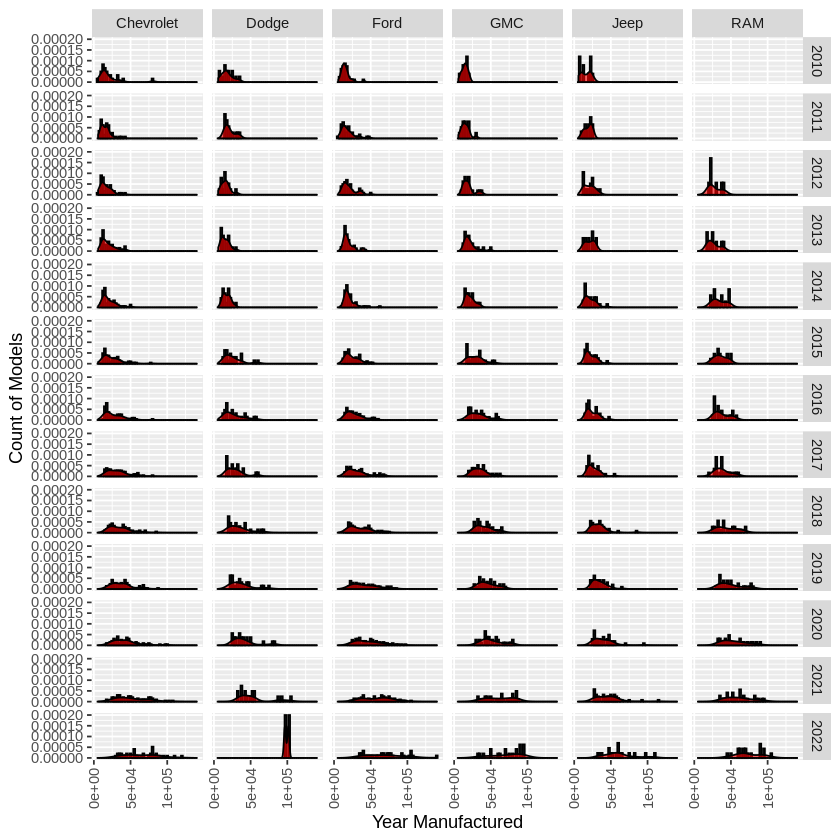

In [13]:
# Trying density plot of models by Year and gridded by manuf
# Some outliers showing
ggplot(data_usa_brands, aes(x=Price_mean)) + 
 geom_histogram(aes(y=..density..), colour="black", fill="lightblue", binwidth=2500) +
  facet_grid(Year~Make) + labs(x= 'Year Manufactured', y = 'Count of Models') +
     geom_density(alpha=.6, fill="red") + theme(axis.text.x = element_text(angle = 90, vjust = 0.5, hjust=1))

In [14]:
#Aggregating the mean price for all models by a Manuf
aggdata <- aggregate(data_usa_brands$Price_mean, by=list(Make=data_usa_brands$Make, Year=data_usa_brands$Year), FUN=mean, na.rm=TRUE)

In [15]:
head(aggdata)

Make,Year,x
<fct>,<dbl>,<dbl>
Chevrolet,2010,20039.58
Dodge,2010,18079.80
Ford,2010,15738.22
GMC,2010,14624.50
Jeep,2010,16080.50
Chevrolet,2011,16729.51


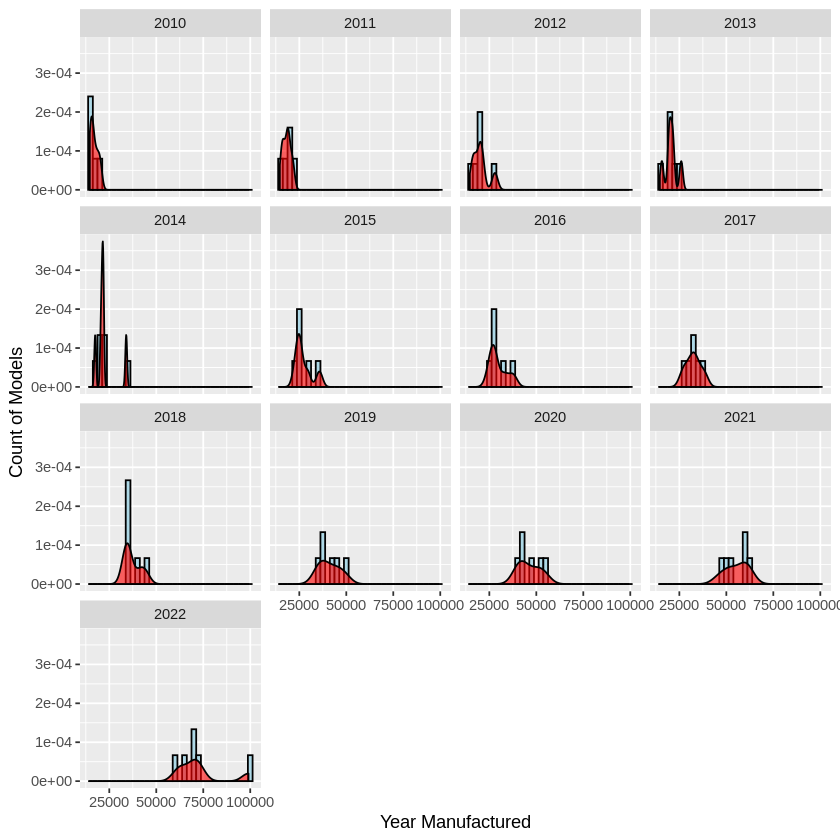

In [16]:
#Aggregated Make data showing year over year mean price density.
ggplot(aggdata, aes(x=x)) + 
 geom_histogram(aes(y=..density..), colour="black", fill="lightblue", binwidth=2500) +
  facet_wrap(~Year) + labs(x= 'Year Manufactured', y = 'Count of Models') +
     geom_density(alpha=.6, fill="red") 

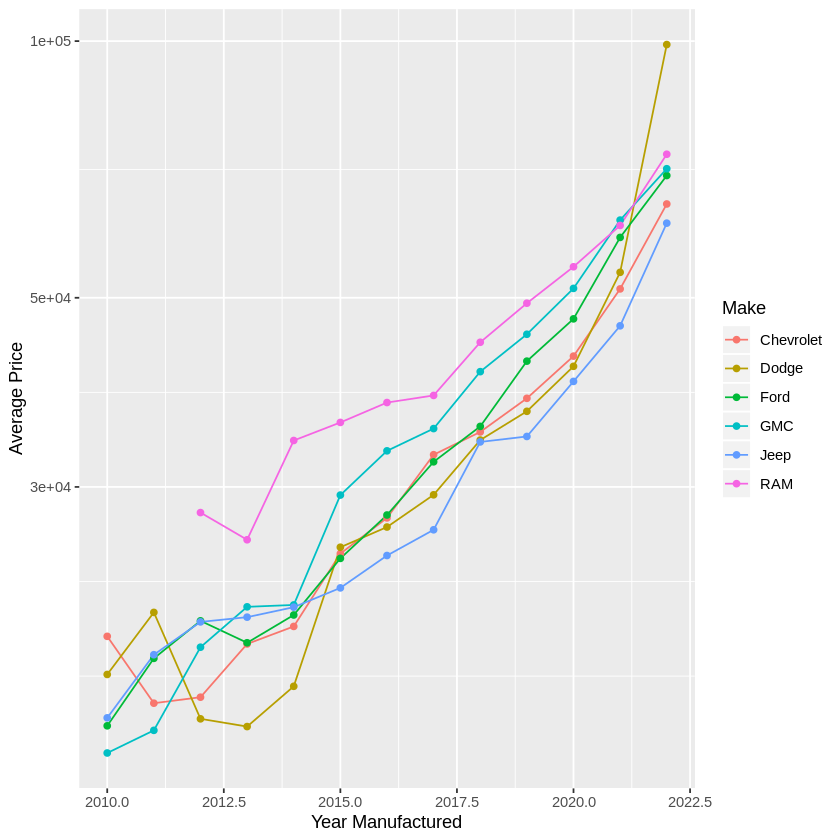

In [17]:
# Aggregated Data year over year average price change
ggplot(aggdata, aes(x=Year, y=x, group=Make, color = Make)) + geom_line() +
       geom_point() + scale_y_log10() + labs(x= 'Year Manufactured', y = 'Average Price')

## Subsetting the Data - Luxury Brands (testing performance cars and ultra luxury)

In [18]:
# Subsetting luxury brands
data_lux_brands <- data_reduced %>% filter(Make == 'BMW' | Make == 'Cadillac' | Make == 'Lexus'|
                                           Make == 'Mercedes-Benz'| Make == 'Porsche'| Make == 'Jaguar'| Make == 'Audi')

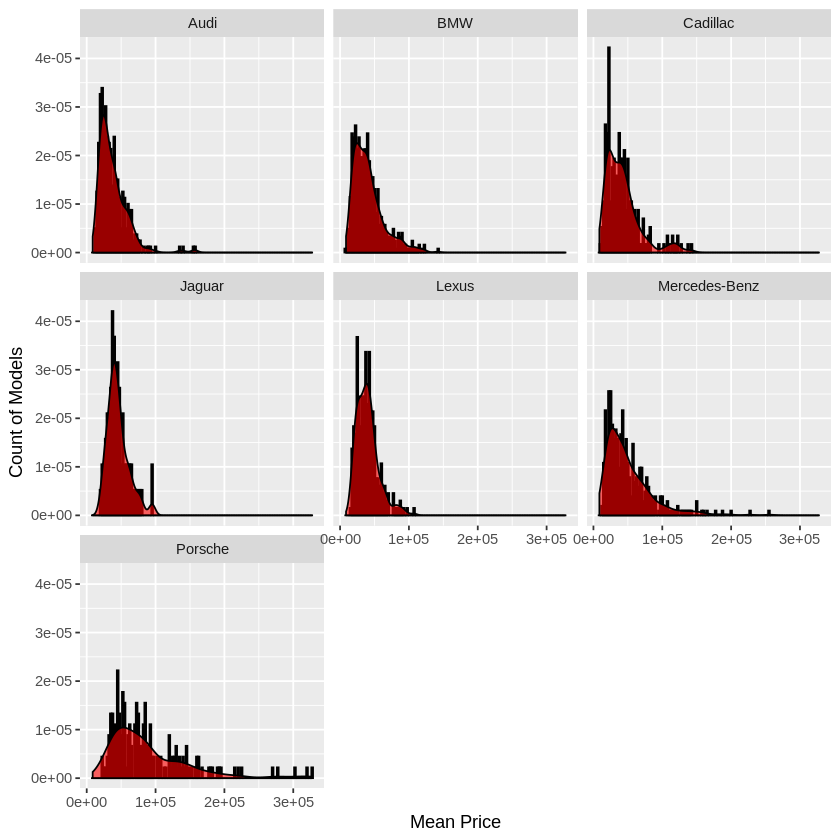

In [19]:
# Density plot for luxury brands mean price and count of models
ggplot(data_lux_brands, aes(x=Price_mean)) + 
 geom_histogram(aes(y=..density..), colour="black", fill="lightblue", binwidth=2500) +
  facet_wrap(~Make) + labs(x= 'Mean Price', y = 'Count of Models') +
     geom_density(alpha=.6, fill="red") 

Warning message:
“Groups with fewer than two data points have been dropped.”Warning message:
“Groups with fewer than two data points have been dropped.”

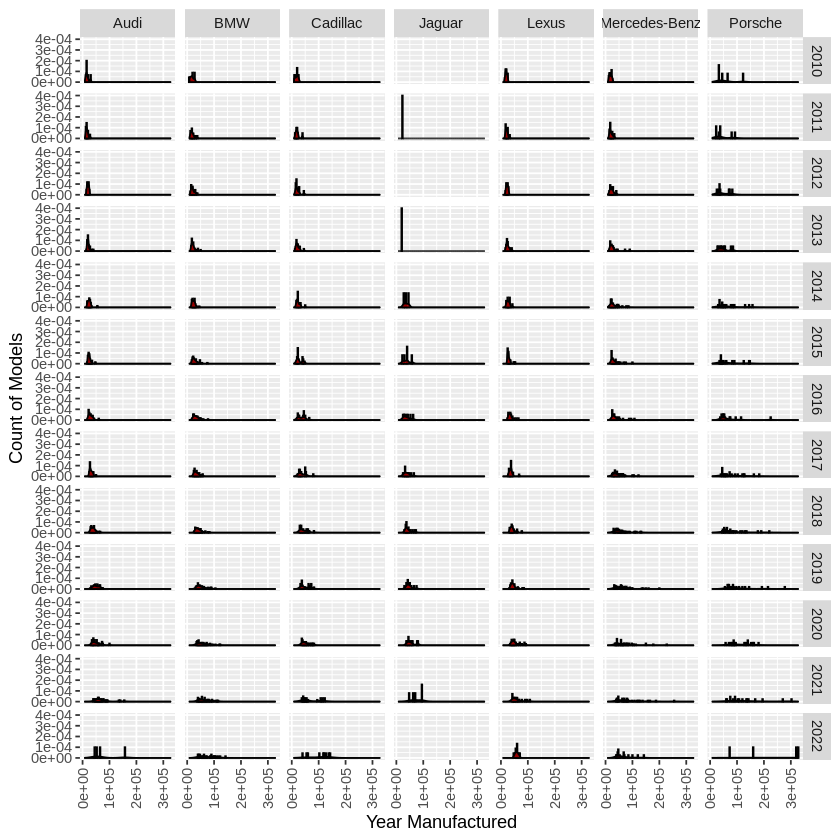

In [20]:
# Trying density plot of models by Year and gridded by manuf
# Spread is much higher in general and in regards to highest price with these brands
ggplot(data_lux_brands, aes(x=Price_mean)) + 
 geom_histogram(aes(y=..density..), colour="black", fill="lightblue", binwidth=2500) +
  facet_grid(Year~Make) + labs(x= 'Year Manufactured', y = 'Count of Models') +
     geom_density(alpha=.6, fill="red") + theme(axis.text.x = element_text(angle = 90, vjust = 0.5, hjust=1))

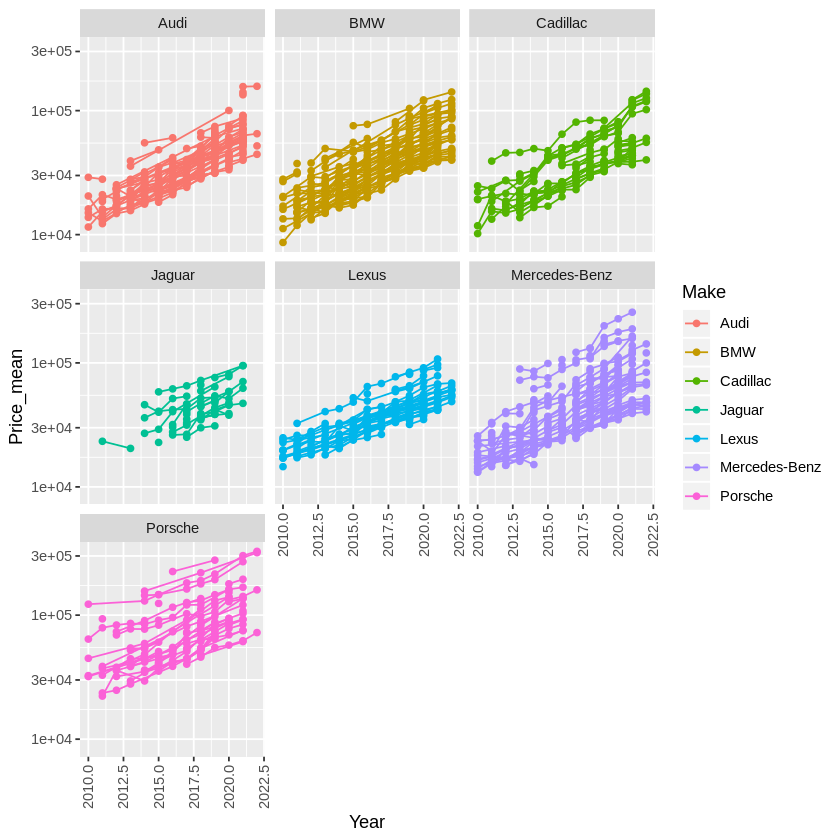

In [40]:
#Plotting the models and mean price with geompoint
# Jaguar does not have enough data 
# Straight lines indicate holding value
ggplot(data_lux_brands, aes(x=Year, y=Price_mean, group=Model, color = Make)) + geom_line() +
       geom_point() + scale_y_log10() + facet_wrap(~Make) + theme(axis.text.x = element_text(angle = 90, vjust = 0.5, hjust=1))

In [22]:
# Not much data on these performance car brands
data_super_brands <- data_reduced %>% filter(Make == 'Ferrari' | Make == 'Lamborghini' | Make == 'McLaren')
nrow(data_super_brands)

[1] 22

In [23]:
# Same with ultra luxury brands
data_monical_brands <- data_reduced %>% filter(Make == 'Aston' | Make == 'Bentley' | Make == 'Rolls-Royce')
nrow(data_monical_brands)

[1] 37

## Further Subsetting the Data - Ford subset to only trims of the F150

In [24]:
# Subsetting for the F150 and wanting to reduce further for count of models and year as we saw a fall off in previous viz
data_f150 <- data_reduced %>% filter(grepl('F-1',Model)) %>% filter(Count >= 20 & Year >= 2015)

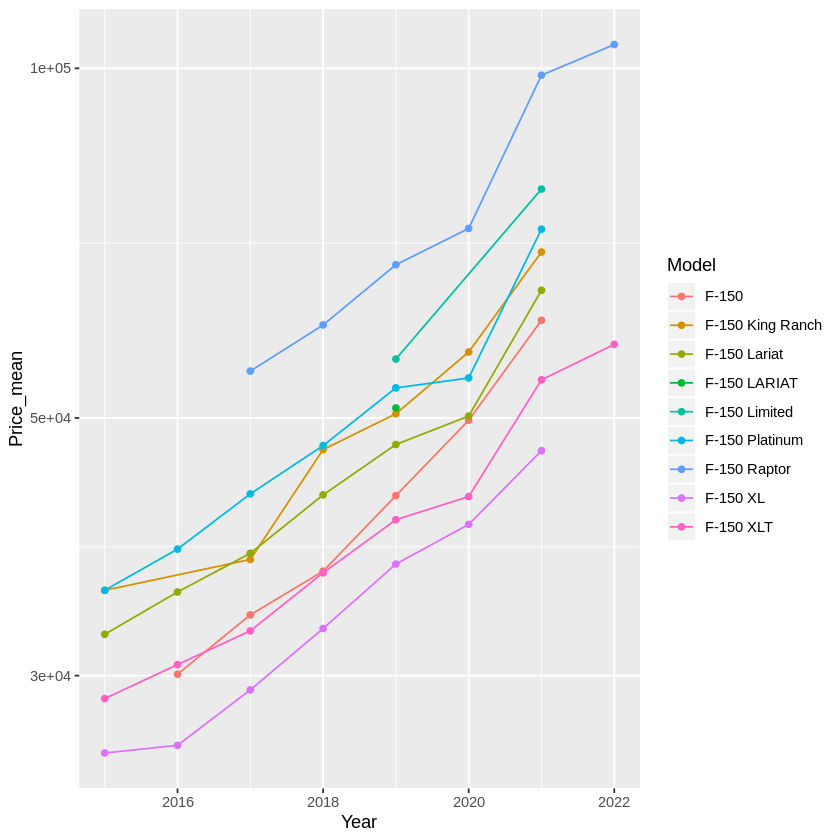

In [25]:
# Price mean by particular trim of the F-150
ggplot(data_f150, aes(x=Year, y=Price_mean, color = Model)) + geom_line() +
       geom_point() + scale_y_log10()

In [26]:
# Aggregating the mean price across the F-150 line of trims
aggdata2 <- aggregate(data_f150$Price_mean, by=list(Make=data_f150$Make, Year=data_f150$Year), FUN=mean, na.rm=TRUE)

In [27]:
# Aggregating the mean mileage across the F-150 line of trims
aggdata3 <- aggregate(data_f150$Mileage_mean, by=list(Make=data_f150$Make, Year=data_f150$Year), FUN=mean, na.rm=TRUE)

In [28]:
#Joining the two into one dataframe
total_agg <- merge(aggdata2,aggdata3,by=c("Make","Year"))
total_agg <- total_agg %>% 
  rename(
    Price_mean = x.x,
    Mileage_mean = x.y)

In [29]:
total_agg

Make,Year,Price_mean,Mileage_mean
<fct>,<dbl>,<dbl>,<dbl>
Ford,2015,31605.40,99778.60
Ford,2016,32170.00,85015.80
Ford,2017,38526.57,78382.14
Ford,2018,43424.57,66792.00
Ford,2019,49670.11,44035.33
Ford,2020,52450.00,34709.14
Ford,2021,68175.50,14887.25
Ford,2022,81339.50,2257.50


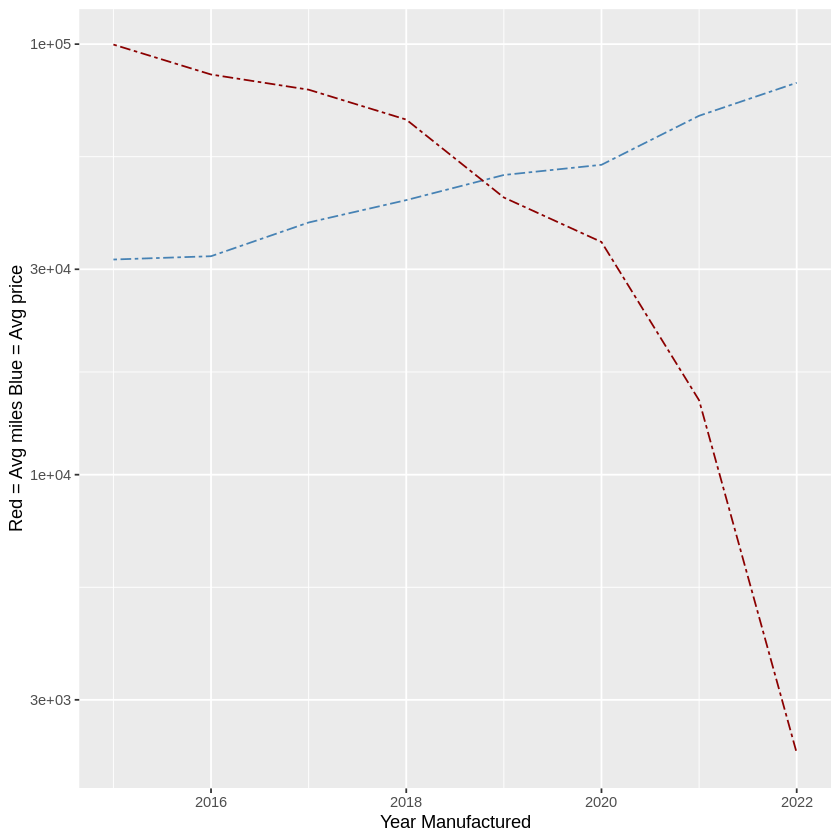

In [30]:
#Plotting avg price and average mileage for all f-150s
ggplot(total_agg, aes(x=Year)) + geom_line(aes(y = Price_mean), color="steelblue", linetype="twodash") +
        scale_y_log10() + geom_line(aes(y = Mileage_mean), color="darkred", linetype="twodash") + labs(x= 'Year Manufactured', y = 'Red = Avg miles Blue = Avg price')

## Continued Exploratory

In [31]:
# Keeping only 20 count and 8yrs old and newer and 80000 or less price.
# Throwing out high variable brands.Scion and Mitsubishi are no longer made. 
# Maserati is a performance brand. Jag does not have much data. 
data_reduced2 <- df %>% filter(Count >= 20 & Year >= 2014 & Price_mean <= 80000 & 
                               Make != 'FIAT' & Make != 'Scion' & Make != 'Mitsubishi' & Make != 'Alfa' &
                              Make != 'Maserati' & Make != 'Jaguar')

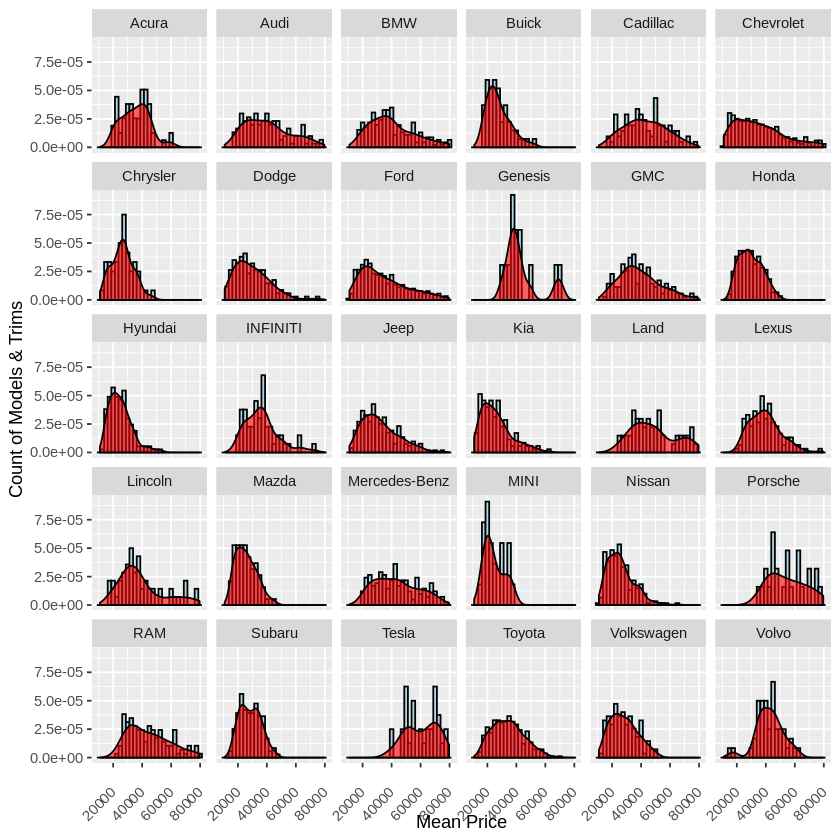

In [43]:
# THis speaks to the segmentation of auto brands. How wide ranging their offering is in price.
ggplot(data_reduced2, aes(x=Price_mean)) + 
 geom_histogram(aes(y=..density..), colour="black", fill="lightblue", binwidth=2500) +
  facet_wrap(~Make) + labs(x= 'Mean Price', y = 'Count of Models & Trims') +
     geom_density(alpha=.6, fill="red") + theme(axis.text.x = element_text(angle = 45, vjust = 0.5, hjust=1))

In [33]:
# Genesis has the GV80 3.5T - A new SUV - with 33 examples and price mean at 70808. Explains the spike above on the higher end.
# Typically their sweet spot is in the 40K range the largest spike above
data_reduced2 %>% filter(Make =='Genesis') %>% arrange(-Price_mean)

Make,Model,Year,Price_mean,Price_min,Price_max,Mileage_mean,Mileage_min,Mileage_max,Count
<fct>,<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Genesis,GV80 3.5T,2021,70808,63992,79950,10228,2882,19985,33
Genesis,GV70 3.5T Sport,2022,67359,61998,76787,9296,135,15472,29
Genesis,G70 3.3T,2022,49159,44300,54991,6544,732,17695,48
Genesis,G70 3.3T,2020,43737,40990,49310,16240,3640,31064,21
Genesis,G80 3.3T Sport,2019,42413,40279,48901,24227,14270,39938,32
Genesis,G70 2.0T,2021,40030,34487,48990,12808,1975,31592,31
Genesis,G70 3.3T Advanced,2019,39748,35547,44959,26473,5975,98703,61
Genesis,G80 3.3T Sport,2018,38244,27792,44998,44018,17743,118292,29
Genesis,G80 3.8,2019,37098,29000,42990,23849,7721,64815,51


In [34]:
# All minis vehicles are lower priced. Explaining the spike towards the left of the above graph
data_reduced2 %>% filter(Make =='MINI') %>% arrange(-Price_mean)

Make,Model,Year,Price_mean,Price_min,Price_max,Mileage_mean,Mileage_min,Mileage_max,Count
<fct>,<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
MINI,Countryman Cooper S ALL4,2020,37569,33750,41199,15658,3634,32616,21
MINI,E Countryman Cooper S ALL4,2019,36208,33999,40974,27488,11754,59747,24
MINI,Convertible Cooper S,2019,35379,28998,38998,19726,3707,52439,23
MINI,Countryman Cooper S ALL4,2019,34038,23000,40888,30949,6338,62511,73
MINI,Countryman Cooper S,2019,31128,26998,36000,24948,6875,38553,36
MINI,Hardtop Cooper S,2020,30307,23995,36990,20343,6306,68996,25
MINI,Hardtop Cooper S,2019,28919,18000,33900,23918,1552,74655,77
MINI,Hardtop Cooper,2019,25079,21245,29990,24383,3989,70606,47
MINI,Clubman Cooper S ALL4,2017,24875,17508,30998,46880,11068,127107,21


## Only Full Size Trucks

In [35]:
Trucks <- data_reduced2 %>% filter(grepl('F-1',Model) | grepl('Silv',Model) | 
                         grepl('1500',Model) | grepl('Sierra',Model) | grepl('Tundra',Model))  

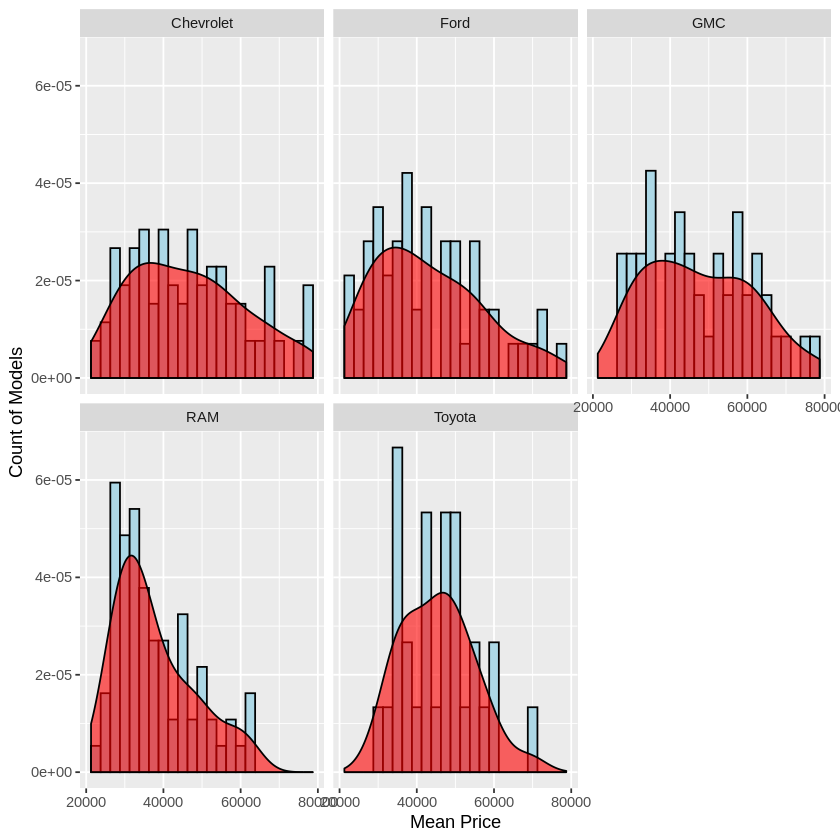

In [36]:
# Another density plot of average price and number of trims for sale in that range
ggplot(Trucks, aes(x=Price_mean)) + 
 geom_histogram(aes(y=..density..), colour="black", fill="lightblue", binwidth=2500) +
  facet_wrap(~Make) + labs(x= 'Mean Price', y = 'Count of Models') +
     geom_density(alpha=.6, fill="red") 

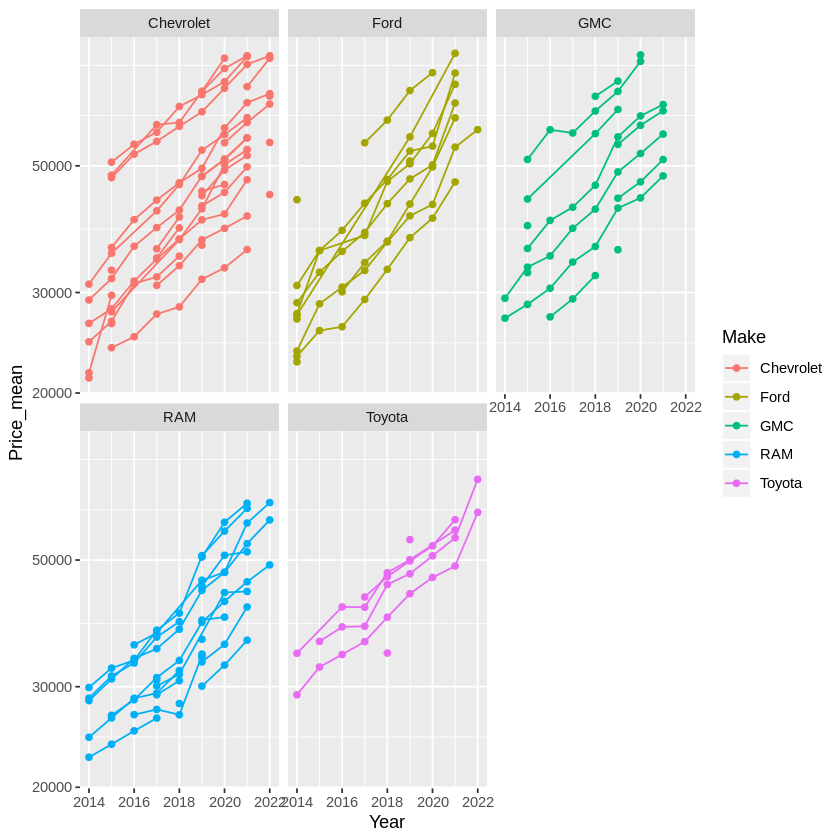

In [37]:
# All model trims price average over the years
ggplot(Trucks, aes(x=Year, y=Price_mean, group=Model, color = Make)) + geom_line() +
       geom_point() + scale_y_log10() + facet_wrap(~Make)

In [38]:
# Adding all trims together into make and aggregating mean price and mean mileage then joining 
aggtrucks <- aggregate(Trucks$Price_mean, by=list(Make=Trucks$Make, Year=Trucks$Year), FUN=mean, na.rm=TRUE)
aggtrucks2 <- aggregate(Trucks$Mileage_mean, by=list(Make=Trucks$Make, Year=Trucks$Year), FUN=mean, na.rm=TRUE)
total_truck_agg <- merge(aggtrucks,aggtrucks2,by=c("Make","Year"))
total_truck_agg

Make,Year,x.x,x.y
<fct>,<dbl>,<dbl>,<dbl>
Chevrolet,2014,25697.50,108966.500
Chevrolet,2015,34228.15,106018.923
Chevrolet,2016,38713.14,86593.429
Chevrolet,2017,40889.50,77538.833
Chevrolet,2018,43619.23,69733.538
Chevrolet,2019,48865.50,47554.500
Chevrolet,2020,54134.69,36230.000
Chevrolet,2021,58373.13,20923.600
Chevrolet,2022,64552.43,6245.143


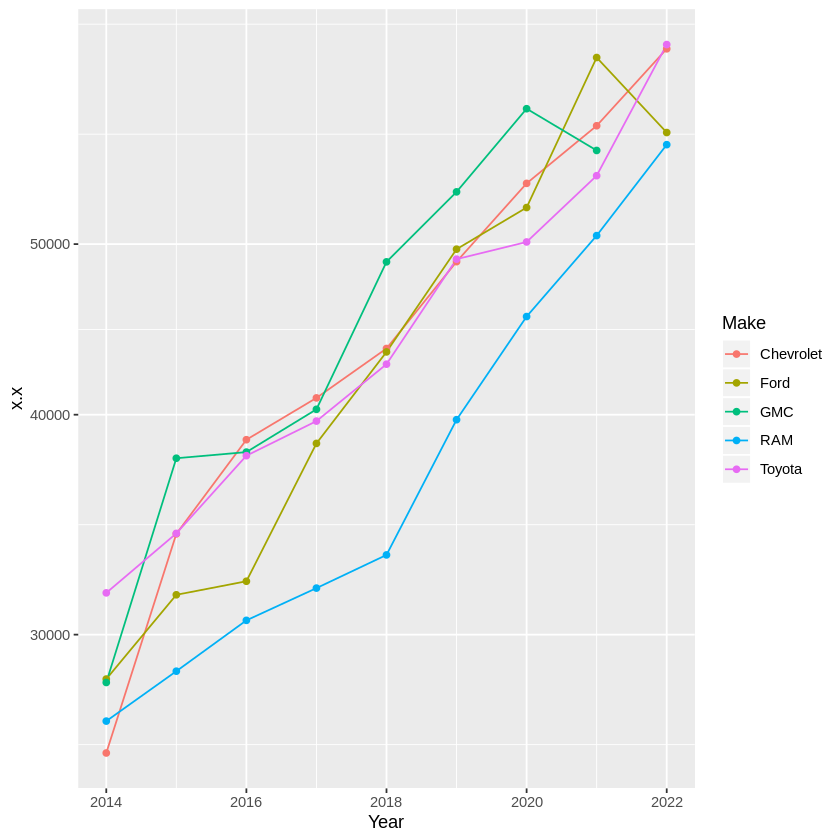

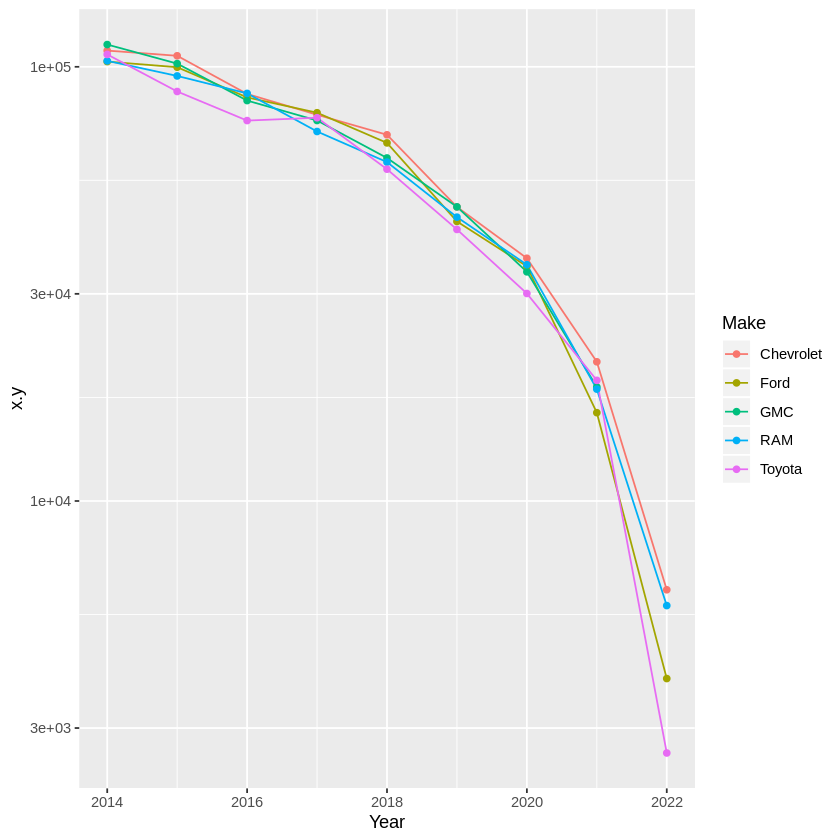

In [39]:
# Average price over the years by make
ggplot(total_truck_agg, aes(x=Year, y=x.x, color = Make)) + geom_line() +
       geom_point() + scale_y_log10()
# Average mileage over the years by make
ggplot(total_truck_agg, aes(x=Year, y=x.y, color = Make)) + geom_line() +
       geom_point() + scale_y_log10()